Aufgaben PyTorch
================



## Install PyTorch



Checkout this website, to obtain the command to install Pytorch:
[https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

Check the version



In [1]:
import torch
print(f'Version {torch.__version__}')

Version 1.12.1


and run some code:



In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7496, 0.0502, 0.3450],
        [0.6730, 0.7747, 0.3278],
        [0.6845, 0.8165, 0.1180],
        [0.7094, 0.4464, 0.3486],
        [0.4081, 0.2729, 0.6026]])


## Shapes



1.  Create a tensor `a` from a list with 9 elements (e.g, `range(9)`). Predict and then check the shape (size).

2.  Create a new tensor using `b = a.view(3, 3)`. What does view do? Check that a and b share the same storage.

3.  Create a tensor `c = b[1:, 1:]`. Predict and then check the shape.



In [3]:
# 1.
a = torch.tensor([i for i in range(9)])
print(a)
print(a.device)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
cpu


In [4]:
# 2. 
b = a.view(3, 3)
print(b)
# Same storage?
b[0, 0] = 42
print(a)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([42,  1,  2,  3,  4,  5,  6,  7,  8])


In [5]:
#3.
c = b[1:, 1:]
print(c)

tensor([[4, 5],
        [7, 8]])


## Broadcasting



Predict and check the result of the following operation:



In [6]:
a = torch.tensor(range(9)).reshape(3,3)
b = torch.tensor([1, 1, 1])
print(a)
print(b)
print(a+b)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([1, 1, 1])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


Can you  explain the observed behaviour?



## Sharing between NumPy and PyTorch



Create a random `numpy` array (for example with `numpy.random.normal`) of shape (4,3).
Now create a bridged torch tensor (`from_numpy`).
Show that multiplying the torch tensor with some number, also change `a`.
Hint: to multiply in place use `mul_`.



In [7]:
import numpy as np

a = np.random.rand(4, 3)
print(a)

[[0.6345527  0.98936709 0.92851592]
 [0.86885191 0.41357955 0.18062408]
 [0.64417304 0.84928555 0.02117523]
 [0.77289656 0.31918671 0.52143605]]


In [8]:
b = torch.from_numpy(a)
b.mul_(100)
print(a)
print(b.device)

[[63.45527045 98.93670893 92.8515919 ]
 [86.88519084 41.3579547  18.06240767]
 [64.41730423 84.92855489  2.1175227 ]
 [77.28965625 31.91867088 52.14360541]]
cpu


## Autograd



For $x=1$ compute the following
$$
\frac{d}{d x} f(h(x))
$$
where $f(x) = x^3$ and $h(x)=cos(x)$.

1.  First compute the result by *hand* (use the chain rule, and a calculator)
2.  Write a Python script to compute it with PyTorch using  `autograd`.



In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import math
def f(x):
    return torch.pow(x, 3)
def h(x):
    return torch.cos(x)

In [11]:
x = torch.tensor([[1.0]], requires_grad=True)
print(x)
print(x.grad)
y = f(h(x))
print(y)

tensor([[1.]], requires_grad=True)
None
tensor([[0.1577]], grad_fn=<PowBackward0>)


In [12]:
y.backward()
print(x.grad)

tensor([[-0.7369]])


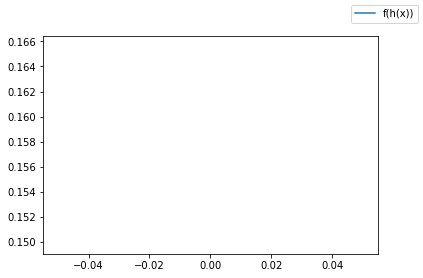

In [13]:
fig, axs = plt.subplots()
axs.plot(y.detach().numpy(), label=f"f(h(x))")
fig.legend()